In [15]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from matplotlib.legend_handler import HandlerLine2D
import warnings
warnings.filterwarnings('ignore')

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X, Y)

In [16]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
XtS, params = ml.rescale(Xt)
XvS, _ = ml.rescale(Xva, params)

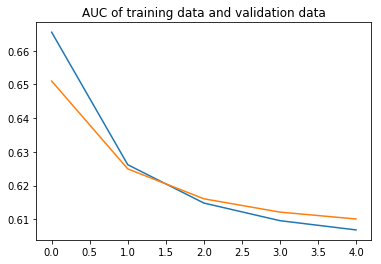

In [17]:
learner = ml.linearC.linearClassify()
aucs_t=[]
aucs_v=[]
for i, r in enumerate(range(5)):
    learner.train(XtS, Yt, reg=r, initStep=0.1, stopTol=1e-6, stopIter=100)
    auc_t = learner.auc(XtS, Yt)
    aucs_t.insert(i, auc_t)
    auc_v = learner.auc(XvS, Yva)
    aucs_v.insert(i, auc_v)

plt.title('AUC of training data and validation data')
plt.plot(aucs_t)
plt.plot(aucs_v)
plt.show()

In [18]:
XtP = ml.transforms.fpoly(Xt, degree=2, bias=False)
XtPS,params = ml.rescale(XtP)
XvaPS,_ = ml.rescale( ml.transforms.fpoly(Xva,degree=2,bias=False), params)

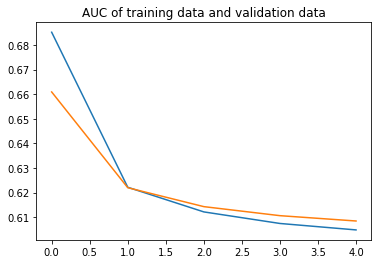

In [19]:
learner = ml.linearC.linearClassify()
aucs_t=[]
aucs_v=[]
for i, r in enumerate(range(5)):
    learner.train(XtPS, Yt, reg=r, initStep=0.1, stopTol=1e-6, stopIter=100)
    auc_t = learner.auc(XtPS, Yt)
    aucs_t.insert(i, auc_t)
    auc_v = learner.auc(XvaPS, Yva)
    aucs_v.insert(i, auc_v)

plt.title('AUC of training data and validation data')
plt.plot(aucs_t)
plt.plot(aucs_v)
plt.show()